<a href="https://colab.research.google.com/github/bernieee/SIRIUS/blob/master/AI_for_Med_image_analysis/Practicum3_lung_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This is the second practical task of Sirius summer school "Applying AI for Med image analysis". 
Practical tasks take form of jupyter notebook with example code in the begging and some tasks in the end. Please, provide your solution in form of python code. Read hints, google a lot, don't hesitate to ask us directyl and most importatly - 
<span style="color:blue">have fun</span>.


**Topic**: Deep learning segmentation 

**To submit**: New version of the notebook, with your code. 

Loading dataset for segmentation is a bit different from simple classification. Below is full dataset class, which loads image and corresponding segmentation mask. 

In [1]:
#to read mask files
!pip install imageio 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/Sirius 2020/'

In [48]:
import numpy as np
import imageio
import torch
from torch.utils.data import Dataset,DataLoader
import os 
import matplotlib.pyplot as plt
import albumentations as albu
from albumentations.core.composition import Compose
from albumentations.pytorch import ToTensor
from sklearn.model_selection import train_test_split

class LungSegmentationDataset(Dataset):
    def __init__(self,image_list,augmentations=None,transformations=None):
        self.path = "/content/drive/My Drive/Sirius 2020/data/Lung images from Bram"
        self.images = image_list
        self.augmentations = augmentations
        self.transformations = transformations
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self,index):
        filename = self.images[index]
        image = imageio.imread(os.path.join(self.path,"Images/"+filename))
        mask_name = filename.split(".")[0]+".gif"
        left_lung = imageio.imread(os.path.join(self.path,"scratch/masks/left lung/"+mask_name))
        right_lung = imageio.imread(os.path.join(self.path,"scratch/masks/right lung/"+mask_name))
        lungs = left_lung + right_lung
        result = {"image":image,"mask":lungs}
        
        if self.transformations:
            result = self.transformations(**result)
            
        if self.augmentations:
            result = self.augmentations(**result)
        return result
  

In [49]:
images = os.listdir("/content/drive/My Drive/Sirius 2020/data/Lung images from Bram/Images")
transorms = Compose([albu.augmentations.transforms.Resize(224,224),ToTensor()])
#HINT: to combine augmentations or transforms use albumentations.core.composition.Compose
train,test = train_test_split(images,test_size=0.2)
train = LungSegmentationDataset(train,transformations=transorms)
test = LungSegmentationDataset(test,transformations=transorms) #do not apply augmentations to test set

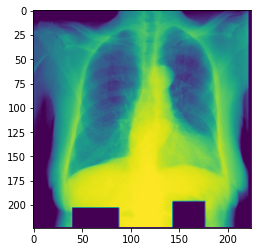

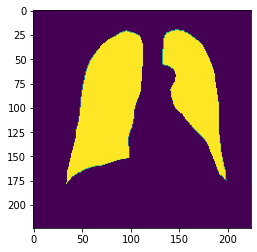

In [42]:
#Visualization
sample = train[0]
plt.imshow(sample['image'][0])
plt.show()
plt.imshow(sample['mask'][0])

In [45]:
np.round(sample['image'])

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [6]:
!pip install segmentation-models-pytorch

     |████████████████████████████████| 51kB 1.5MB/s 
     |████████████████████████████████| 61kB 3.2MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-cp36-none-any.whl size=12422 sha256=40aae880cba6f47624a1b2fbed9c4a493a30f032e7f8b7fcc8b09b4bf05cf58c
  Stored in directory: /root/.cache/pip/wheels/42/1e/a9/2a578ba9ad04e776e80bf0f70d8a7f4c29ec0718b92d8f6ccd
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60962 sha256=24bc822b29f2734d943fae5a92750f3145d3cf6cb4a78a7c6f437093abae0941
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built efficientnet-pytorch pretrainedmodels


## **Task 2:**
- Your task is to create training loop and train some model to output segmentation. We won't judge model quality, just the corectness of training loop. To get some inspiration:
- Given: Dataset class for lung segmentation
- Do: Create training loop, which will fit **any** segmentation model with proper loss function. 


- https://www.learnopencv.com/pytorch-for-beginners-semantic-segmentation-using-torchvision/
- https://medium.com/analytics-vidhya/pytorch-implementation-of-semantic-segmentation-for-single-class-from-scratch-81f96643c98c

In [ ]:
import segmentation_models_pytorch as smp

model = smp.Unet('resnet34', classes=1)

print(sample['image'].shape)
print(sample['mask'].shape)
print(sample['image'].unsqueeze(0).shape)
res = model(sample['image'].unsqueeze(0))
plt.imshow(res.detach().numpy()[0,0])

In [51]:
from torch import optim
import segmentation_models_pytorch as smp

model = smp.Unet('resnet34', classes=1)

#train = np.round(train)
#test = np.round(test)

train_loader = DataLoader(train,batch_size=30)
criterion = torch.nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


In [ ]:
num_epochs = 20

for i in range(num_epochs):
    for sample in train_loader:
        image, label = sample['image'], sample['mask']
        prediction = model(image) 

        print(image.shape)
        print(label.shape)
        print(prediction.shape)

        optimizer.zero_grad()
        loss = criterion(prediction, label)
        loss.backward()
        optimizer.step() 

        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    print("Epoch = ", i, "Training loss = ", train_loss)


In [11]:
len(train)

197

In [12]:
len(test)

50